In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

2023-04-19 16:22:20.518622: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [2]:
model_filepath = "../model/resnet3_un_25of25.h5"

m = tf.keras.models.load_model(model_filepath)

2023-04-19 16:22:28.085241: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-04-19 16:22:28.097579: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2023-04-19 16:22:28.292026: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:12:00.0 name: Tesla V100-PCIE-32GB computeCapability: 7.0
coreClock: 1.38GHz coreCount: 80 deviceMemorySize: 31.75GiB deviceMemoryBandwidth: 836.37GiB/s
2023-04-19 16:22:28.292735: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 1 with properties: 
pciBusID: 0000:13:00.0 name: Tesla V100-PCIE-32GB computeCapability: 7.0
coreClock: 1.38GHz coreCount: 80 deviceMemorySize: 31.75GiB deviceMemoryBandwidth: 836.37GiB/s
2023-04-19 16:22:28.293418: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 2 with properties: 
pciBusID: 0000:14:00.0 name: Tesl

In [3]:
m.compile(optimizer='adam')

In [4]:
# Load the low-resolution images for validation
lr_images_val = np.load('../Datasets/lr_images_un_val.npy')/255.0

# Load the high-resolution images for validation
hr_images_val = np.load('../Datasets/hr_images_val.npy')/255.0

In [5]:
batch_size=1

sr_images_val = m.predict(lr_images_val, batch_size=batch_size)

2023-04-19 16:22:48.189258: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2023-04-19 16:22:48.189982: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2500000000 Hz
2023-04-19 16:22:49.929558: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.7
2023-04-19 16:22:52.825696: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10


In [6]:
print(lr_images_val.shape, sr_images_val.shape, hr_images_val.shape)
print(lr_images_val.min(), lr_images_val.max(), lr_images_val.mean())
print(sr_images_val.min(), sr_images_val.max(), sr_images_val.mean())
print(hr_images_val.min(), hr_images_val.max(), hr_images_val.mean())
print(sr_images_val[0, 450, 450:455, :])
print(hr_images_val[0, 450, 450:455, :])

(100, 255, 255, 3) (100, 1020, 1020, 3) (100, 1020, 1020, 3)
0.0 1.0 0.28805351345510716
-0.652461 1.8682442 0.2948819
0.0 1.0 0.28864251107542743
[[0.06610215 0.05642108 0.1831204 ]
 [0.19528042 0.1139407  0.12362652]
 [0.11065964 0.10217556 0.15215264]
 [0.16731279 0.09129791 0.07374144]
 [0.10976988 0.1072828  0.15300788]]
[[0.1372549  0.1372549  0.15294118]
 [0.10980392 0.10588235 0.12941176]
 [0.11372549 0.10980392 0.12941176]
 [0.10588235 0.10588235 0.1254902 ]
 [0.09411765 0.09019608 0.10980392]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


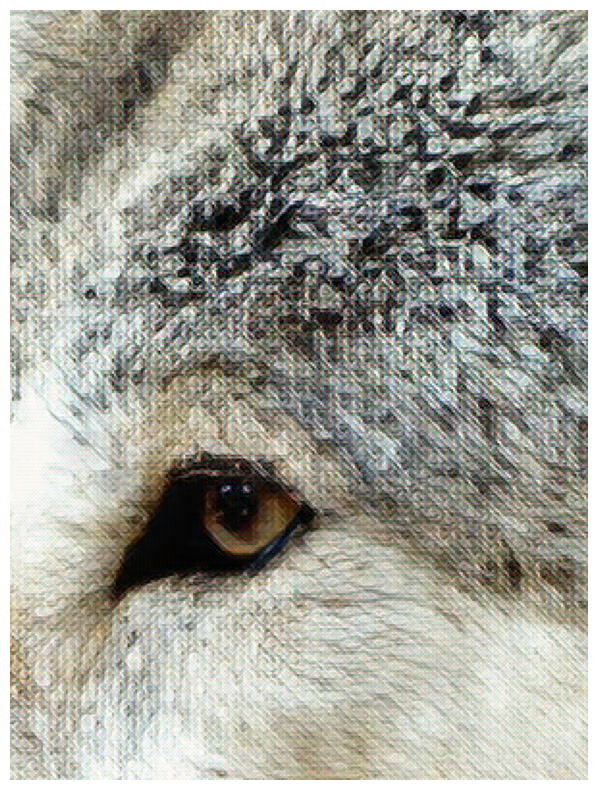

In [14]:
images_start = 5
hr_start_h = 350
hr_end_h = hr_start_h+300
hr_start_v = 140
hr_end_v = hr_start_v+400

plt.figure(figsize=(10, 10))
plt.imshow(sr_images_val[images_start-1, hr_start_v:hr_end_v, hr_start_h:hr_end_h, :])
plt.axis('off');

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


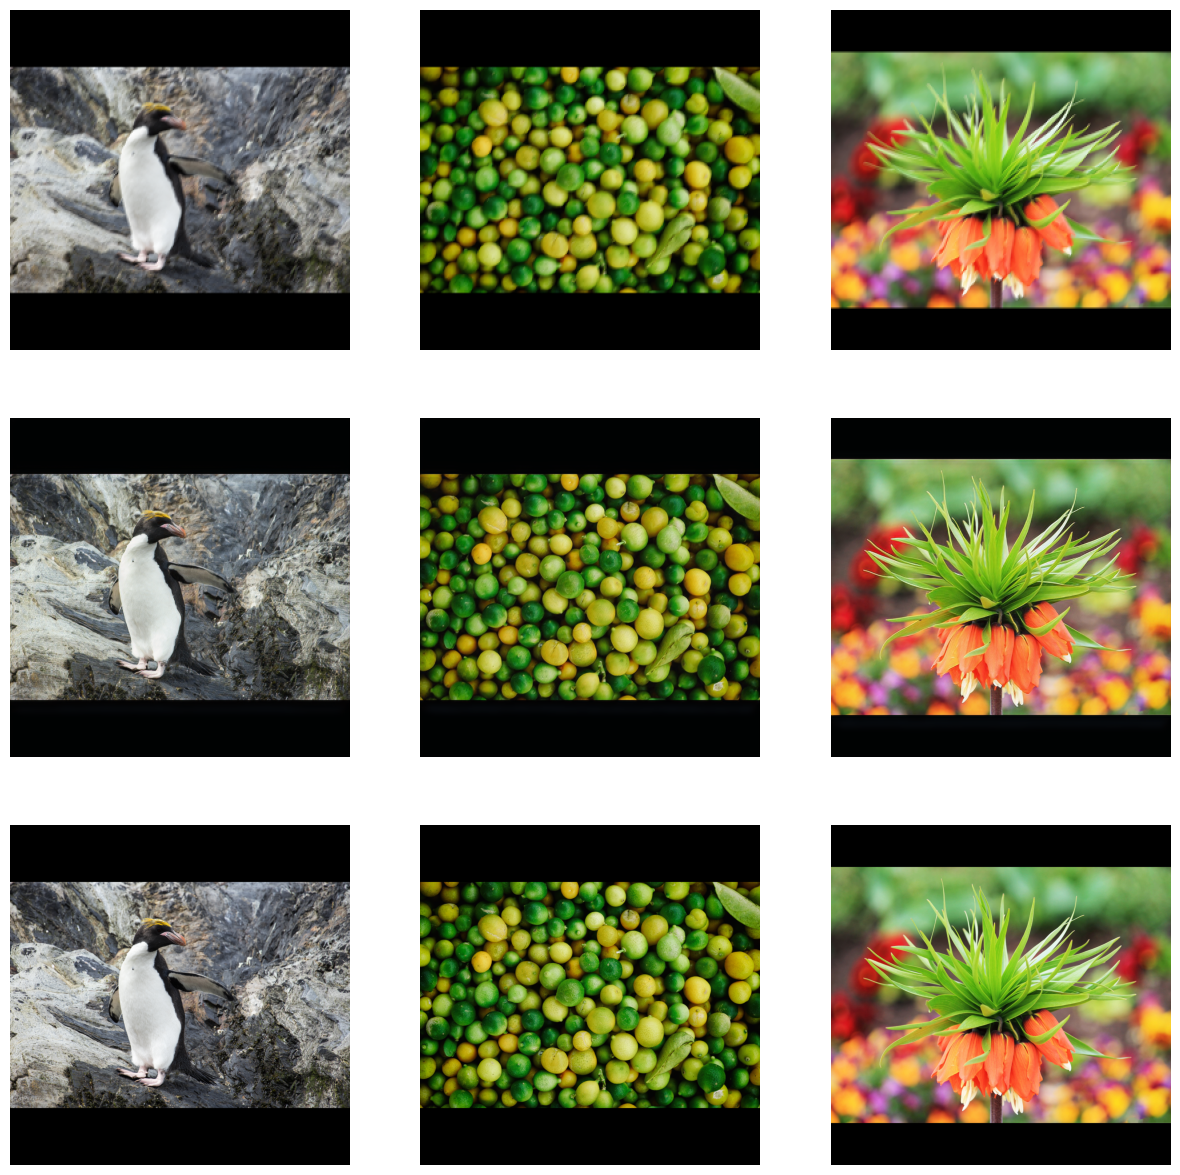

In [15]:
sample_images = 3
images_start = 1

fig, axes = plt.subplots(nrows=3, ncols=sample_images, figsize=(5*sample_images, 5*3))
# fig, axes = plt.subplots(nrows=2, ncols=sample_images, figsize=(10*sample_images, 10*2))

for i, ax in enumerate(axes[0]):
    ax.imshow(lr_images_val[i+images_start-1])
    ax.set_axis_off()

# for i, ax in enumerate(axes[0]):
for i, ax in enumerate(axes[1]):
    ax.imshow(sr_images_val[i+images_start-1])
    ax.set_axis_off()
    
# for i, ax in enumerate(axes[1]):
for i, ax in enumerate(axes[2]):
    ax.imshow(hr_images_val[i+images_start-1])
    ax.set_axis_off()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


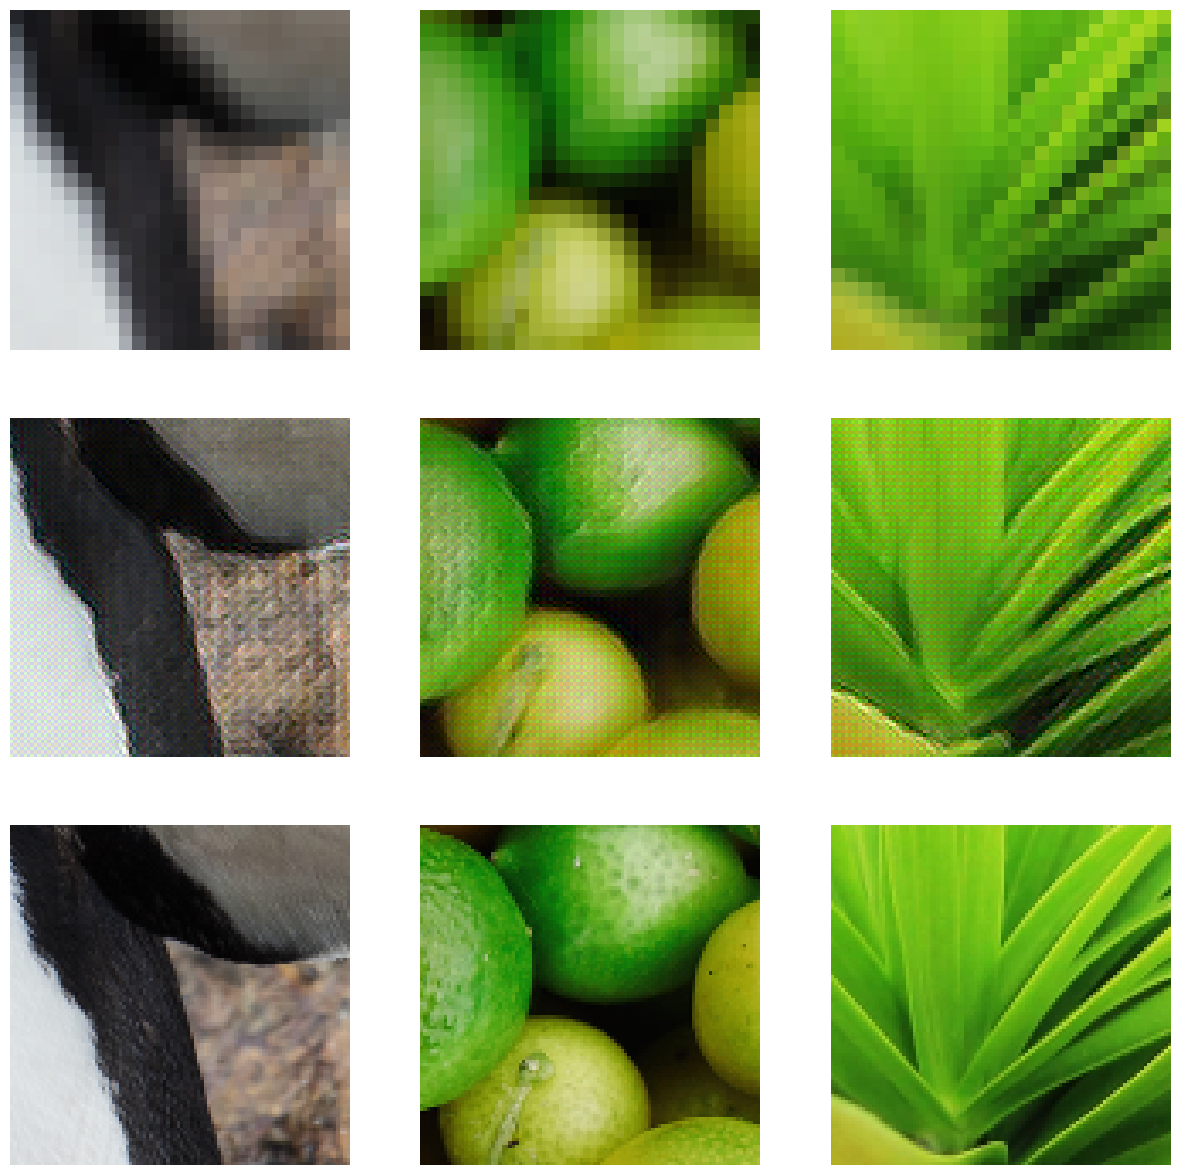

In [16]:
sample_images = 3
images_start = 1
hr_start, hr_end = 460, 560
lr_start, lr_end = int(hr_start/4), int(hr_end/4)

fig, axes = plt.subplots(nrows=3, ncols=sample_images, figsize=(5*sample_images, 5*3))

for i, ax in enumerate(axes[0]):
    ax.imshow(lr_images_val[i+images_start-1, lr_start:lr_end, lr_start:lr_end, :])
    ax.set_axis_off()

for i, ax in enumerate(axes[1]):
    ax.imshow(sr_images_val[i+images_start-1, hr_start:hr_end, hr_start:hr_end, :])
    ax.set_axis_off()

for i, ax in enumerate(axes[2]):
    ax.imshow(hr_images_val[i+images_start-1, hr_start:hr_end, hr_start:hr_end, :])
    ax.set_axis_off()

In [17]:
from tensorflow.image import psnr
model_psnr = np.array(psnr(hr_images_val, sr_images_val, max_val=1.0)).mean()

In [18]:
print("PSNR:", model_psnr)

PSNR: 22.333452
